In [25]:
import pandas as pd
import numpy as np

In [26]:
d = {
    'Luisa':[4,5],
    'Maria':[1,7],
    'Carla':[5,10],
    'Giovanna':[9,2],
    'Lucia':[6,4]}

In [27]:
df = pd.DataFrame().from_dict(d, orient='index')
df.columns = ['Age', 'Number of Eggs/Week']

In [28]:
df['AgeRank'] = df['Age'].rank(ascending=0)
df['EggRank'] = df['Number of Eggs/Week'].rank(ascending=0)
df

,Age,Number of Eggs/Week,AgeRank,EggRank
Luisa,4,5,4.0,3.0
Maria,1,7,5.0,2.0
Carla,5,10,3.0,1.0
Giovanna,9,2,1.0,5.0
Lucia,6,4,2.0,4.0


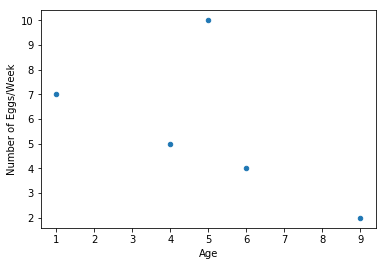

In [29]:
%matplotlib inline
df.plot.scatter(x='Age', y='Number of Eggs/Week')

In [30]:
def P(v1,v2):
    d = v1-v2
    d = np.square(d)
    d = sum(d)
    d = d*6
    N = len(v1)
    n = np.square(N)
    N = N*(n-1)
    return 1- (d / N)

In [31]:
print("Spearman correlation:")
P(np.array(df['AgeRank']), np.array(df['EggRank']))

Spearman correlation:


-0.7

a = -0.617
==========
b = 8,685
=========
from hand calculation

In [32]:
age_mean = df['Age'].mean()
age_mean

5.0

In [33]:
eggs_mean = df['Number of Eggs/Week'].mean()
eggs_mean

5.6

In [34]:
def slope(x,y,mean_x,mean_y):
    return sum(((x-mean_x) * (y-mean_y))) / sum(np.square((x-mean_x)))

def intercept(mean_x, mean_y, a):
    return mean_y - (a*mean_x)

def Y(x, a, b):
    return (a*x) + b

In [35]:
x = np.array(df['Age'])
y = np.array(df['Number of Eggs/Week'])

In [36]:
a = slope(x,y,age_mean,eggs_mean)
a

-0.6176470588235294

In [37]:
b = intercept(age_mean, eggs_mean, a)
b

8.688235294117646

In [38]:
#prediction for 4-years-old chicken
Y(4, a, b)

6.217647058823529

In [39]:
df_removed_outlier = df.drop(['Carla'])
df_removed_outlier['AgeRank'] = df_removed_outlier['Age'].rank(ascending=0)
df_removed_outlier['EggRank'] = df_removed_outlier['Number of Eggs/Week'].rank(ascending=0)
df_removed_outlier

,Age,Number of Eggs/Week,AgeRank,EggRank
Luisa,4,5,3.0,2.0
Maria,1,7,4.0,1.0
Giovanna,9,2,1.0,4.0
Lucia,6,4,2.0,3.0


In [40]:
print('Spearman correlation with removed outlier')
P(np.array(df_removed_outlier['AgeRank']), np.array(df_removed_outlier['EggRank']))

Spearman correlation with removed outlier


-1.0

In [41]:
#the max value beside the outlier
max_egg_value = df.drop(['Carla']).max()['Number of Eggs/Week']
max_egg_value

7.0

In [42]:
df_normalized = df.copy(deep=True)
df_normalized.loc[df_normalized['Number of Eggs/Week'] == df_normalized['Number of Eggs/Week'].max(), 'Number of Eggs/Week'] = max_egg_value
df_normalized['AgeRank'] = df_normalized['Age'].rank(ascending=0)
df_normalized['EggRank'] = df_normalized['Number of Eggs/Week'].rank(ascending=0)
df_normalized

,Age,Number of Eggs/Week,AgeRank,EggRank
Luisa,4,5.0,4.0,3.0
Maria,1,7.0,5.0,1.5
Carla,5,7.0,3.0,1.5
Giovanna,9,2.0,1.0,5.0
Lucia,6,4.0,2.0,4.0


In [74]:
print('Spearman correlation with normalized outlier')
P(np.array(df_normalized['AgeRank']), np.array(df_normalized['EggRank']))

Spearman correlation with normalized outlier


-0.7749999999999999

Data + Regression Line from original 
------

In [54]:
df['EggsPredicted'] = Y(df[['Age']], a, b)
df

,Age,Number of Eggs/Week,AgeRank,EggRank,EggsPredicted
Luisa,4,5,4.0,3.0,6.217647
Maria,1,7,5.0,2.0,8.070588
Carla,5,10,3.0,1.0,5.600000
Giovanna,9,2,1.0,5.0,3.129412
Lucia,6,4,2.0,4.0,4.982353


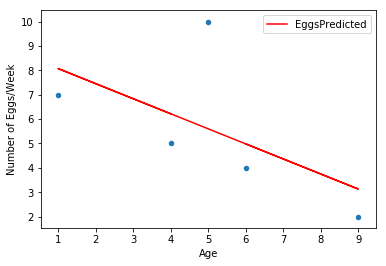

In [56]:
ax = df.plot.line(x='Age', y='EggsPredicted', color='red')
df.plot.scatter(x='Age', y='Number of Eggs/Week', ax=ax)

Data + Regression Line from removed outlier
------

In [69]:
x = np.array(df_removed_outlier['Age'])
y = np.array(df_removed_outlier['Number of Eggs/Week'])
age_mean = df_removed_outlier['Age'].mean()
eggs_mean = df_removed_outlier['Number of Eggs/Week'].mean()
a = slope(x, y, age_mean, eggs_mean)
b = intercept(age_mean, eggs_mean, a)
df_removed_outlier['EggsPredicted'] = Y(df_removed_outlier[['Age']], a, b)
df_removed_outlier

,Age,Number of Eggs/Week,AgeRank,EggRank,EggsPredicted
Luisa,4,5,3.0,2.0,5.117647
Maria,1,7,4.0,1.0,6.970588
Giovanna,9,2,1.0,4.0,2.029412
Lucia,6,4,2.0,3.0,3.882353


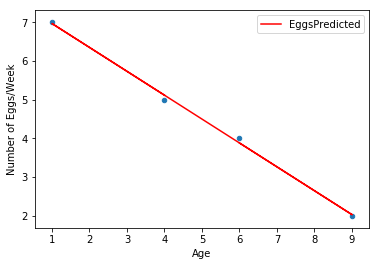

In [70]:
ax = df_removed_outlier.plot.line(x='Age', y='EggsPredicted', color='red')
df_removed_outlier.plot.scatter(x='Age', y='Number of Eggs/Week', ax=ax)

Data + Regression Line from normalized
-----

In [72]:
x = np.array(df_normalized['Age'])
y = np.array(df_normalized['Number of Eggs/Week'])
age_mean = df_normalized['Age'].mean()
eggs_mean = df_normalized['Number of Eggs/Week'].mean()
a = slope(x, y, age_mean, eggs_mean)
b = intercept(age_mean, eggs_mean, a)
df_normalized['EggsPredicted'] = Y(df_normalized[['Age']], a, b)
df_normalized

,Age,Number of Eggs/Week,AgeRank,EggRank,EggsPredicted
Luisa,4,5.0,4.0,3.0,5.617647
Maria,1,7.0,5.0,1.5,7.470588
Carla,5,7.0,3.0,1.5,5.000000
Giovanna,9,2.0,1.0,5.0,2.529412
Lucia,6,4.0,2.0,4.0,4.382353


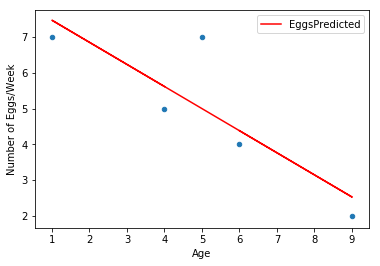

In [73]:
ax = df_normalized.plot.line(x='Age', y='EggsPredicted', color='red')
df_normalized.plot.scatter(x='Age', y='Number of Eggs/Week', ax=ax)